<a href="https://colab.research.google.com/github/Mehdimakoul/ML_2025/blob/main/Projet_ML_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **Chargement des données :**



In [1]:
import pandas as pd
import gdown
url = 'https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8'
output = '/content/DB.txt'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8
From (redirected): https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8&confirm=t&uuid=4f148762-b5f4-4a00-8af8-ad7b0e32658d
To: /content/DB.txt
100%|██████████| 986M/986M [00:11<00:00, 86.1MB/s]


'/content/DB.txt'

In [1]:
import pandas as pd
output = '/content/DB.txt'
data = pd.read_csv(output, delimiter=';', encoding='Utf-8')

<ipython-input-1-d675ec7616ca>:3: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output, delimiter=';', encoding='Utf-8')


In [2]:
data.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [3]:
#c onvertir la colonne  en String
data['ZIBZIN'] = data['ZIBZIN'].astype(str)

# convertir la colonne DateTransaction en date

data['DateTransaction'] = pd.to_datetime(data['DateTransaction'], errors='coerce')

for col in data.columns:
    if col not in ['ZIBZIN', 'DateTransaction']:
        data[col] = data[col].astype(str).str.replace(',', '.').str.strip()
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
data.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044.0,0.0,20.00,2017-02-01 07:32:14,1.0,0.0,0.0,0.0,551.0,...,37.186668,52.076034,0.0,1.0,4.000000,4.0,4.0,20.00,0.00,27134.0
1,A013011306908024927155000,78643045.0,0.0,20.00,2017-02-01 07:43:37,1.0,0.0,0.0,0.0,551.0,...,48.844716,52.076034,1.0,2.0,1.797685,4.0,4.0,28.61,8.61,27817.0
2,A013010002908283134592527,78643046.0,0.0,57.64,2017-02-01 07:47:38,1.0,0.0,0.0,0.0,549.0,...,73.118280,52.076034,0.0,1.0,4.000000,4.0,4.0,57.64,0.00,28058.0
3,A011010002908105209831316,78643047.0,0.0,54.29,2017-02-01 07:48:48,0.0,1.0,1.0,1.0,267.0,...,110.056926,53.554234,0.0,1.0,4.000000,4.0,4.0,54.29,0.00,28128.0
4,A013010041908000125652029,78643048.0,0.0,26.90,2017-02-01 08:13:27,1.0,0.0,0.0,0.0,549.0,...,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,29607.0


# **Analyse des données :**

In [ ]:
# Nombre de lignes et colonnes dans la dataset principale
data.shape

(4646774, 23)

In [ ]:
# Le pourcentage de valeurs manquantes pour chaque variable dans la table principale
((data.isna().sum(axis=0) / data.shape[0])*100).sort_values()

,0
ZIBZIN,0.000000
CA3TRetMtt,0.000022
DiffDateTr3,0.000022
DiffDateTr2,0.000022
DiffDateTr1,0.000022
NbrMagasin3J,0.000022
EcartNumCheq,0.000022
TauxImpNB_CPM,0.000022
TauxImpNb_RB,0.000022
ScoringFP3,0.000022


In [ ]:
print(data[data['IDAvisAutorisationCheque'].isna()]['ZIBZIN'])

1956360    ZIBZIN
Name: ZIBZIN, dtype: object


In [4]:
data = data.dropna(subset=['IDAvisAutorisationCheque'])

In [5]:
# Afficher le pourcentage de valeurs manquantes par colonne, trié par ordre croissant
missing_values = (data.isna().sum() / data.shape[0]) * 100
print(missing_values.sort_values())

ZIBZIN                      0.0
CA3TRetMtt                  0.0
DiffDateTr3                 0.0
DiffDateTr2                 0.0
DiffDateTr1                 0.0
NbrMagasin3J                0.0
EcartNumCheq                0.0
TauxImpNB_CPM               0.0
TauxImpNb_RB                0.0
ScoringFP3                  0.0
CA3TR                       0.0
ScoringFP2                  0.0
D2CB                        0.0
VerifianceCPT3              0.0
VerifianceCPT2              0.0
VerifianceCPT1              0.0
CodeDecision                0.0
DateTransaction             0.0
Montant                     0.0
FlagImpaye                  0.0
IDAvisAutorisationCheque    0.0
ScoringFP1                  0.0
Heure                       0.0
dtype: float64


<Axes: ylabel='count'>

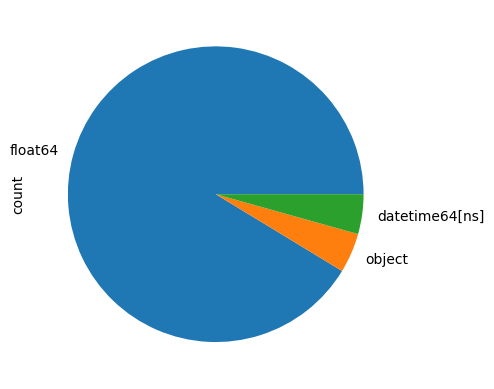

In [ ]:
# Les Types de données
data.dtypes
data.dtypes.value_counts().plot.pie()

In [ ]:
# Informations sur Le Dataset principale - valeur quatitatives
data.describe()

,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4.646773e+06,4.646773e+06,4.646773e+06,4646773,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,...,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06
mean,8.088216e+07,6.455017e-03,6.014214e+01,2017-05-18 06:35:27.977373952,2.516043e-01,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,2.217686e+00,...,3.912727e+01,3.850640e+01,8.480311e+03,1.036989e+00,3.873620e+00,4.166527e+00,4.199614e+00,6.730030e+01,7.158162e+00,5.248595e+04
min,7.864304e+07,0.000000e+00,1.000000e-02,2017-02-01 07:32:14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,7.946082e+07,0.000000e+00,2.598000e+01,2017-03-11 18:03:28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,...,2.223457e+01,2.875694e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,8.029597e+07,0.000000e+00,4.412000e+01,2017-04-20 15:18:42,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,...,3.433578e+01,3.681303e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347800e+04
75%,8.217947e+07,0.000000e+00,7.304000e+01,2017-07-16 12:10:37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344551e-02,...,4.658322e+01,5.088256e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04
max,8.496640e+07,1.000000e+00,1.212600e+05,2017-11-30 22:07:13,4.000000e+00,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,2.049888e+04,...,1.000000e+04,1.276970e+02,9.956167e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.212600e+05,1.560000e+04,8.195800e+04
std,1.781519e+06,8.008340e-02,1.019927e+02,NaN,4.475876e-01,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,2.709370e+01,...,6.011574e+01,1.673441e+01,1.982303e+05,1.920397e-01,1.059257e+00,5.171843e-01,4.242342e-01,1.114365e+02,3.860036e+01,1.187262e+04


<Figure size 300x500 with 0 Axes>

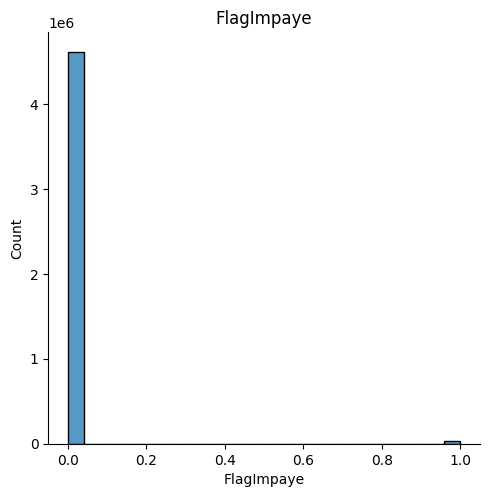

In [ ]:
# Distribution de notre variable Target(cible) (FlagImpaye)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,5))
sns.displot(data['FlagImpaye'])
plt.title('FlagImpaye')
plt.show()

In [ ]:
# Valeurs prises par les variables categorielles
for col in data.select_dtypes('object'):
    print(f'{col :-<40} {data[col].unique()}')
    print()

ZIBZIN---------------------------------- ['A013010004908126703060931' 'A013011306908024927155000'
 'A013010002908283134592527' ... 'A049010278908950520989501'
 'A075000002908324024533014' 'A078010004908211306074580']



### Matrice de  corrélation

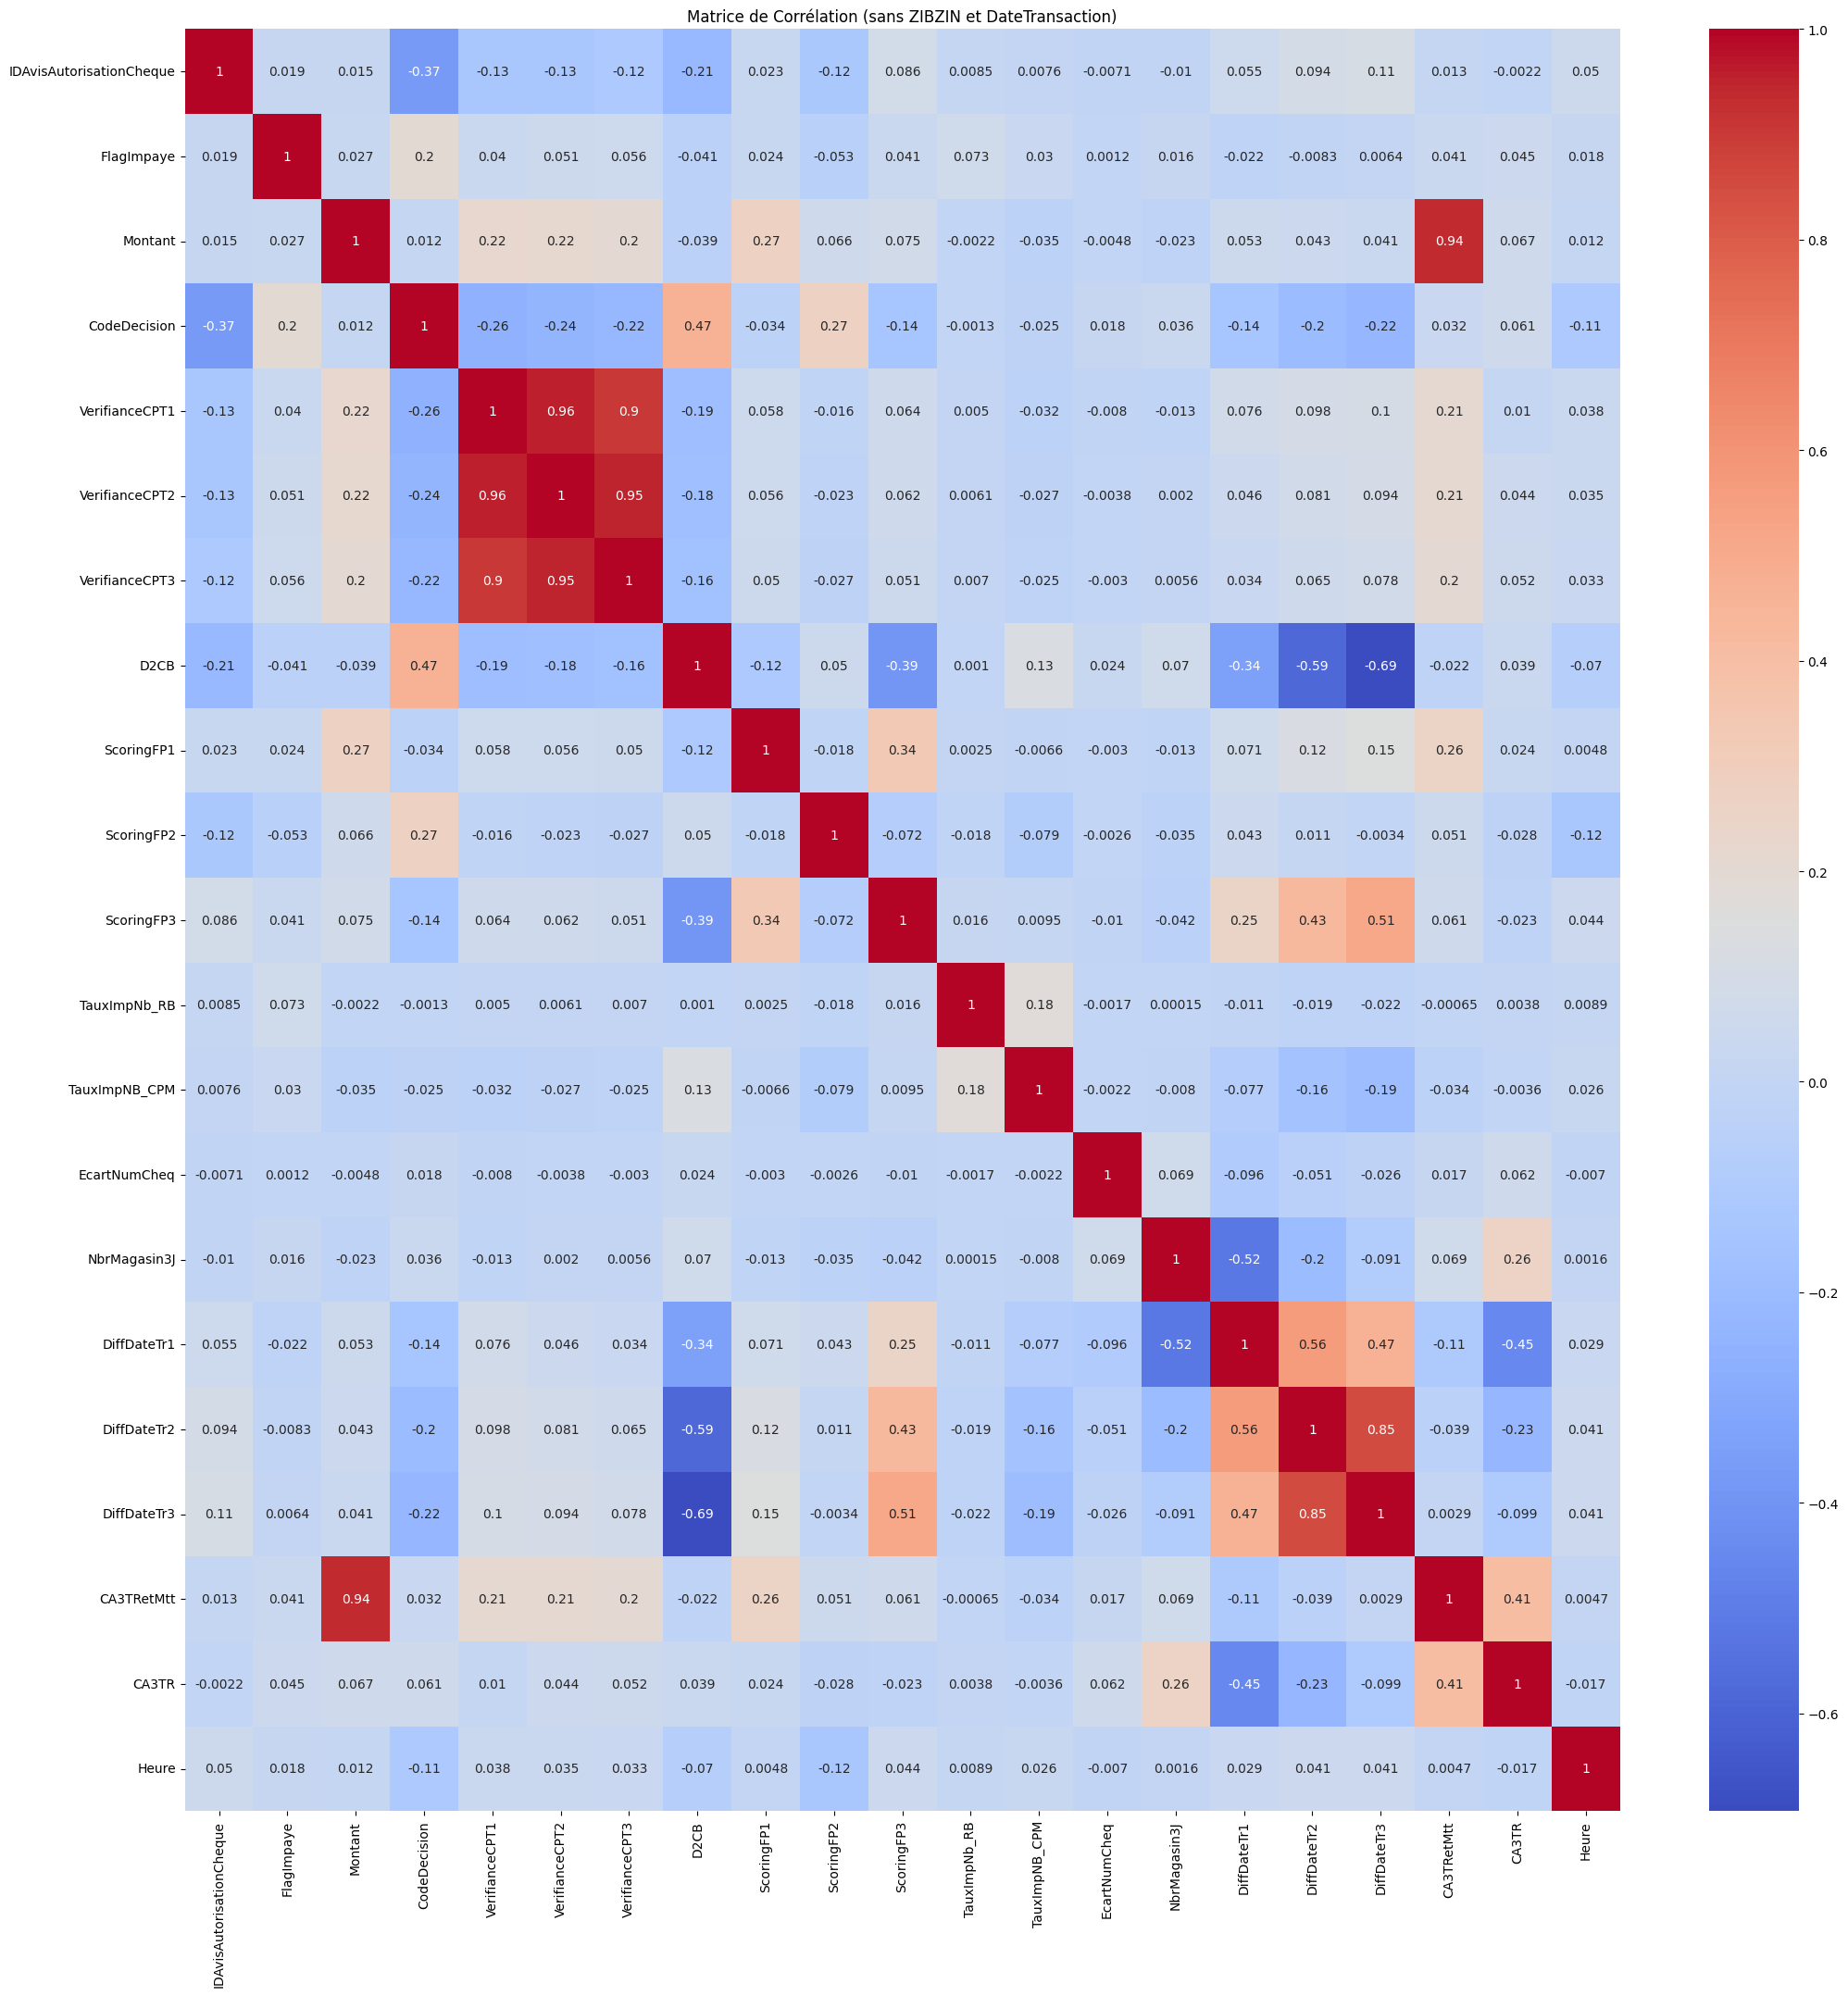

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimer les colonnes 'ZIBZIN' et 'DateTransaction' avant de calculer la matrice de corrélation
dataMatrice = data.drop(columns=['ZIBZIN', 'DateTransaction'])

# Calculer la matrice de corrélation de Pearson
corr_matrix = dataMatrice.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation (sans ZIBZIN et DateTransaction)')
plt.show()

### Extraire les varaibles descriptives

In [ ]:
# Select the variables with correlation > 0.04 with column 'target'
selected_vars = corr_matrix['FlagImpaye'][(corr_matrix['FlagImpaye'] > 0.040) | (corr_matrix['FlagImpaye'] < -0.040)].index.tolist()

# Print the selected variables
print(selected_vars)

['FlagImpaye', 'CodeDecision', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']


In [ ]:
# Select the variables with correlation > 0.045 with column 'target'
selected_vars = corr_matrix['FlagImpaye'][(corr_matrix['FlagImpaye'] > 0.030) | (corr_matrix['FlagImpaye'] < -0.045)].index.tolist()

# Print the selected variables
print(selected_vars)

['FlagImpaye', 'CodeDecision', 'VerifianceCPT1', 'VerifianceCPT2', 'VerifianceCPT3', 'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'CA3TRetMtt', 'CA3TR']


# **Application des modeles de prédiction**

Définir les ensembles de données pour l'apprentissage et le test

In [24]:
data_clean = data

In [ ]:
from sklearn.model_selection import train_test_split

data_clean['DateTransaction'] = pd.to_datetime(data_clean['DateTransaction'])

# Apprentissage : transactions entre '2017-02-01' et '2017-08-31'
train_data = data_clean[(data_clean['DateTransaction'] >= '2017-02-01') &
                             (data_clean['DateTransaction'] <= '2017-08-31')]

# Test : transactions entre '2017-09-01' et '2017-11-30'
test_data = data_clean[(data_clean['DateTransaction'] >= '2017-09-01') &
                            (data_clean['DateTransaction'] <= '2017-11-30')]


In [ ]:
print(train_data.shape, test_data.shape)

(3888468, 23) (737068, 23)


In [25]:
from sklearn.model_selection import train_test_split

data_clean['DateTransaction'] = pd.to_datetime(data_clean['DateTransaction'])

train_data = data_clean[(data_clean['DateTransaction'] >= '2017-02-01') &
                        (data_clean['DateTransaction'] <= '2017-03-31')]

test_data = data_clean[(data_clean['DateTransaction'] >= '2017-09-01') &
                       (data_clean['DateTransaction'] <= '2017-09-15')]

In [11]:
print(train_data.shape, test_data.shape)


(1706284, 23) (112124, 23)


Séparer les variables descriptives (X) et la variable cible (y)

In [26]:
features = ['CodeDecision', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']
X_train = train_data[features]
y_train = train_data['FlagImpaye']
X_test = test_data[features]
y_test = test_data['FlagImpaye']


## Modèle Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer et afficher les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9969
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    730583
         1.0       0.98      0.66      0.79      6485

    accuracy                           1.00    737068
   macro avg       0.99      0.83      0.89    737068
weighted avg       1.00      1.00      1.00    737068



 la matrice de confusion

*   0 : La transaction est acceptée et considérée comme "normale".
*    1 : La transaction est refusée car elle est considérée comme "frauduleuse".




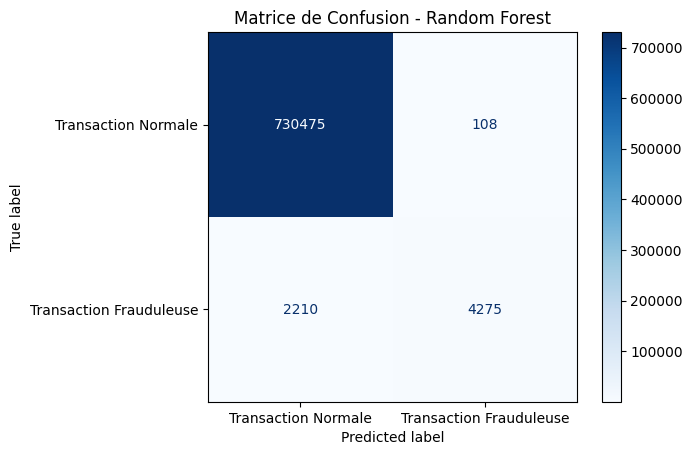

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec des étiquettes et une mise en forme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Transaction Normale", "Transaction Frauduleuse"])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Random Forest")
plt.show()


## Modèle *RandomForest* & SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

data['DateTransaction'] = pd.to_datetime(data['DateTransaction'])

# Apprentissage : transactions entre '2017-02-01' et '2017-04-30'
train_data = data[(data['DateTransaction'] >= '2017-02-01') &
                             (data['DateTransaction'] <= '2017-02-28')]

# Test : transactions entre '2017-09-01' et '2017-10-30'
test_data = data[(data['DateTransaction'] >= '2017-09-01') &
                            (data['DateTransaction'] <= '2017-09-15')]

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Appliquer la méthode SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle sur les données rééquilibrées
rf_model.fit(X_train_res, y_train_res)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer la F-mesure
f1 = f1_score(y_test, y_pred)
print(f'F-mesure: {f1:.4f}')



F-mesure: 0.7609


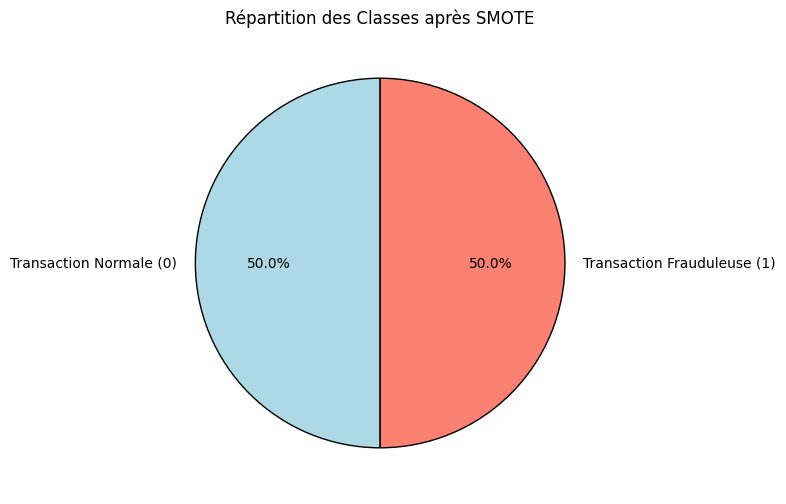

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Appliquer SMOTE
# Compter la répartition des classes après SMOTEENN
class_counts = Counter(y_train_res)
labels = ['Transaction Normale (0)', 'Transaction Frauduleuse (1)']
sizes = [class_counts[0], class_counts[1]]

# Création du graphique camembert
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Répartition des Classes après SMOTE")
plt.show()

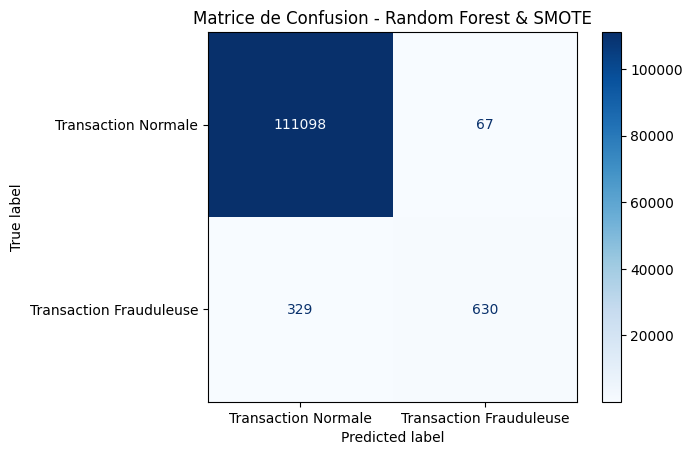

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Transaction Normale", "Transaction Frauduleuse"])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Random Forest & SMOTE")
plt.show()

## Modèle *GradientBoosting*

In [ ]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier


# Initialiser le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entraîner le modèle sur les données rééquilibrées
xgb_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = xgb_model.predict(X_test)

# Calculer la F-mesure
f1 = f1_score(y_test, y_pred)
print(f'F-mesure: {f1:.4f}')


F-mesure: 0.7855


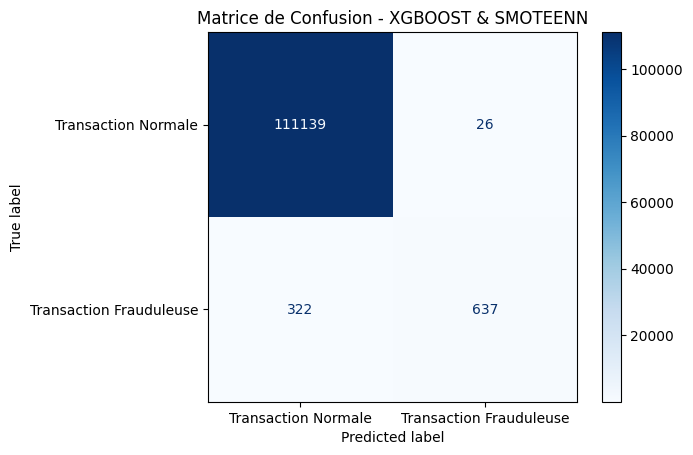

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Transaction Normale", "Transaction Frauduleuse"])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - XGBOOST & SMOTEENN")
plt.show()

## Modèles(SVM,LogReg,XGBoost,NaiveBayes) avec Cross validation





In [9]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [27]:
sampling_methods = {
    "Undersampled": RandomUnderSampler(random_state=42),
    "Oversampled (SMOTE)": SMOTE(random_state=42),
    "Hybrid (SMOTE + Tomek)": SMOTETomek(random_state=42),
    "Oversampled (ADASYN)": ADASYN(random_state=42),
}

In [28]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring_metrics = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'pr_auc': 'average_precision'
}

In [29]:
classifiers = {
    "SVM": CalibratedClassifierCV(estimator=LinearSVC(max_iter=3000, random_state=42, dual=False), method='sigmoid', cv=3),
    "LogReg": LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, n_jobs=8, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "NaiveBayes": GaussianNB()
}

In [14]:
results = []
for sampler_name, sampler in sampling_methods.items():
    for clf_name, clf in classifiers.items():
            print(f"\n=== Evaluating: {sampler_name} + {clf_name} ===")

            # Construire la pipeline
            if sampler_name == "Class Weight Rebalancing":
                if clf_name == "SVM":
                    clf_ = CalibratedClassifierCV(
                        estimator=LinearSVC(max_iter=3000, random_state=42, dual=False, class_weight='balanced'),
                        method='sigmoid',
                        cv=3
                    )
                elif clf_name == "LogReg":
                    clf_ = LogisticRegression(
                        C=1.0,
                        solver='lbfgs',
                        max_iter=1000,
                        n_jobs=2,  # Réduire le nombre de jobs pour éviter d’utiliser toute la RAM
                        random_state=42,
                        class_weight='balanced'
                    )
                pipeline = Pipeline([('clf', clf_)])
            else:
                pipeline = Pipeline([('sampler', sampler), ('clf', clf)]) if sampler else Pipeline([('clf', clf)])

            start_time = time.time()

            # Cross-validation
            scores = cross_validate(
                pipeline,
                X_train,
                y_train,
                cv=cv,
                scoring=scoring_metrics,
                n_jobs=2,
                return_train_score=False
            )

            end_time = time.time()
            exec_time = end_time - start_time

            results.append({
                'Sampler': sampler_name,
                'Classifier': clf_name,
                'F1 Mean': np.mean(scores['test_f1']),
                'F1 Std': np.std(scores['test_f1']),
                'Precision': np.mean(scores['test_precision']),
                'Recall': np.mean(scores['test_recall']),
                'PR AUC': np.mean(scores['test_pr_auc']),
                'Execution Time (s)': exec_time
            })

results_df = pd.DataFrame(results)



=== Evaluating: Undersampled + SVM ===

=== Evaluating: Undersampled + LogReg ===

=== Evaluating: Undersampled + XGBoost ===

=== Evaluating: Undersampled + NaiveBayes ===

=== Evaluating: Oversampled (SMOTE) + SVM ===

=== Evaluating: Oversampled (SMOTE) + LogReg ===

=== Evaluating: Oversampled (SMOTE) + XGBoost ===


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== Evaluating: Oversampled (SMOTE) + NaiveBayes ===

=== Evaluating: Hybrid (SMOTE + Tomek) + SVM ===

=== Evaluating: Hybrid (SMOTE + Tomek) + LogReg ===

=== Evaluating: Hybrid (SMOTE + Tomek) + XGBoost ===

=== Evaluating: Hybrid (SMOTE + Tomek) + NaiveBayes ===

=== Evaluating: Oversampled (ADASYN) + SVM ===

=== Evaluating: Oversampled (ADASYN) + LogReg ===

=== Evaluating: Oversampled (ADASYN) + XGBoost ===

=== Evaluating: Oversampled (ADASYN) + NaiveBayes ===


In [20]:
display(results_df.sort_values(by='F1 Mean', ascending=False))


,Sampler,Classifier,F1 Mean,F1 Std,Precision,Recall,PR AUC,Execution Time (s)
14,Oversampled (ADASYN),XGBoost,0.243534,0.005245,0.144210,0.783312,0.724803,62.994661
10,Hybrid (SMOTE + Tomek),XGBoost,0.239585,0.005961,0.141374,0.785739,0.723382,280.958229
6,Oversampled (SMOTE),XGBoost,0.237210,0.003715,0.139714,0.785392,0.722006,54.381193
2,Undersampled,XGBoost,0.124725,0.003420,0.067342,0.844447,0.664609,7.425977
4,Oversampled (SMOTE),SVM,0.113076,0.000085,0.060831,0.801110,0.421448,98.849704
8,Hybrid (SMOTE + Tomek),SVM,0.113034,0.000086,0.060805,0.801456,0.421521,320.488676
12,Oversampled (ADASYN),SVM,0.110421,0.000291,0.059290,0.802612,0.425878,95.575304
5,Oversampled (SMOTE),LogReg,0.105518,0.000283,0.056432,0.810817,0.381072,217.599593
9,Hybrid (SMOTE + Tomek),LogReg,0.105472,0.000279,0.056406,0.810702,0.381137,499.729123
13,Oversampled (ADASYN),LogReg,0.103123,0.000370,0.055064,0.810701,0.385300,190.977971


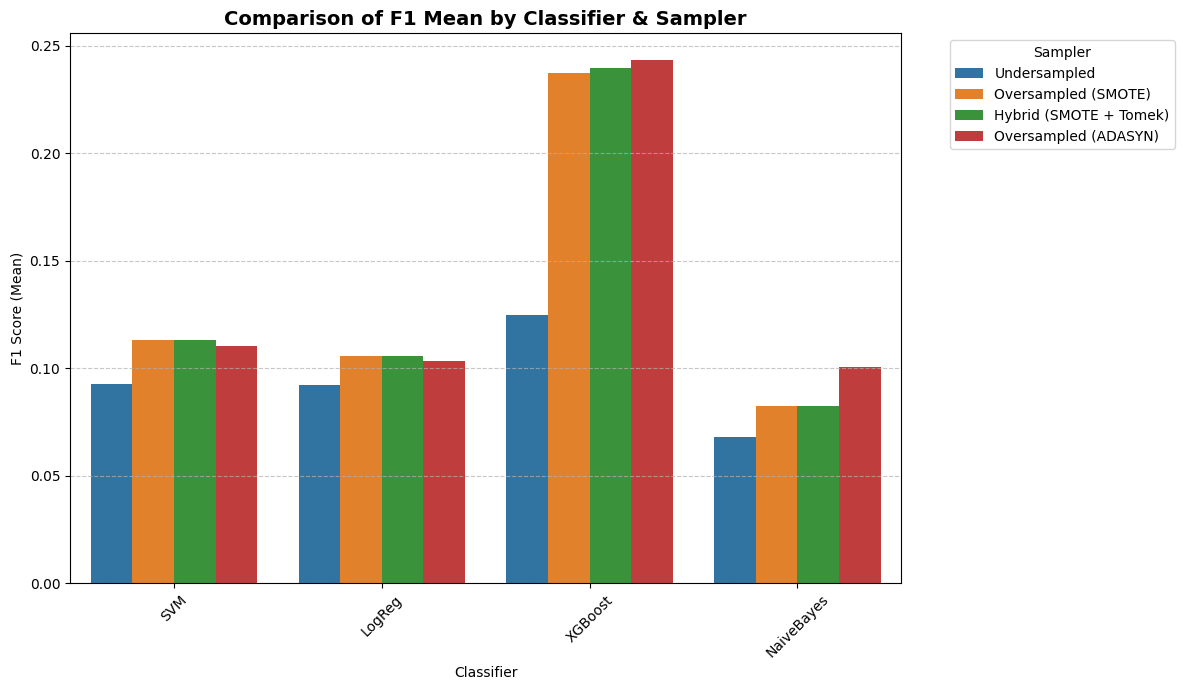

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(data=results_df, x='Classifier', y='F1 Mean', hue='Sampler', errorbar=None)
plt.title("Comparison of F1 Mean by Classifier & Sampler", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("F1 Score (Mean)")
plt.xlabel("Classifier")
plt.legend(title="Sampler", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

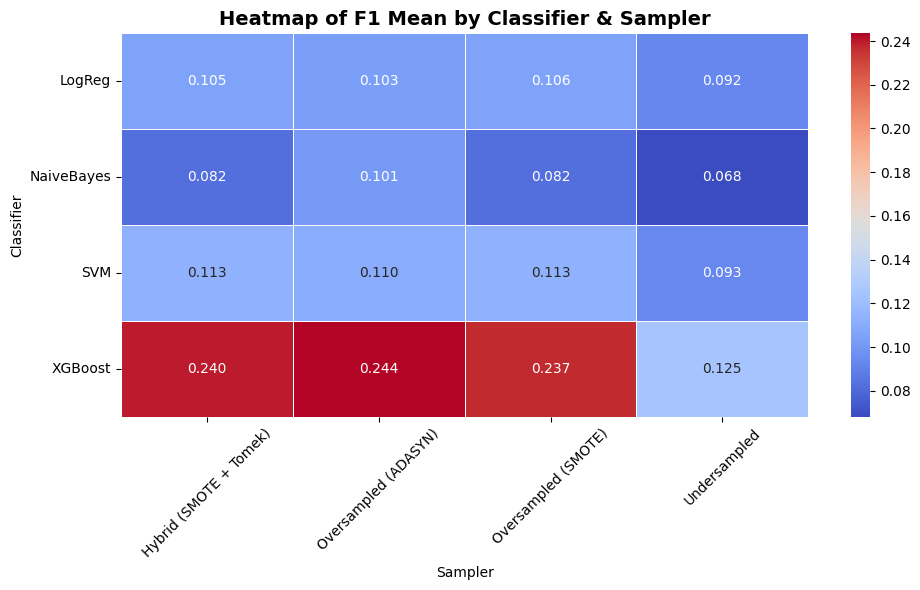

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot_results = results_df.pivot(index="Classifier", columns="Sampler", values="F1 Mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Heatmap of F1 Mean by Classifier & Sampler", fontsize=14, fontweight='bold')
plt.ylabel("Classifier")
plt.xlabel("Sampler")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
features = ['VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']
X_train = train_data[features]
y_train = train_data['FlagImpaye']
X_test = test_data[features]
y_test = test_data['FlagImpaye']

In [30]:
results = []
for sampler_name, sampler in sampling_methods.items():
    for clf_name, clf in classifiers.items():
            print(f"\n=== Evaluating: {sampler_name} + {clf_name} ===")

            # Construire la pipeline
            if sampler_name == "Class Weight Rebalancing":
                if clf_name == "SVM":
                    clf_ = CalibratedClassifierCV(
                        estimator=LinearSVC(max_iter=3000, random_state=42, dual=False, class_weight='balanced'),
                        method='sigmoid',
                        cv=3
                    )
                elif clf_name == "LogReg":
                    clf_ = LogisticRegression(
                        C=1.0,
                        solver='lbfgs',
                        max_iter=1000,
                        n_jobs=2,  # Réduire le nombre de jobs pour éviter d’utiliser toute la RAM
                        random_state=42,
                        class_weight='balanced'
                    )
                pipeline = Pipeline([('clf', clf_)])
            else:
                pipeline = Pipeline([('sampler', sampler), ('clf', clf)]) if sampler else Pipeline([('clf', clf)])

            start_time = time.time()

            # Cross-validation
            scores = cross_validate(
                pipeline,
                X_train,
                y_train,
                cv=cv,
                scoring=scoring_metrics,
                n_jobs=2,
                return_train_score=False
            )

            end_time = time.time()
            exec_time = end_time - start_time

            results.append({
                'Sampler': sampler_name,
                'Classifier': clf_name,
                'F1 Mean': np.mean(scores['test_f1']),
                'F1 Std': np.std(scores['test_f1']),
                'Precision': np.mean(scores['test_precision']),
                'Recall': np.mean(scores['test_recall']),
                'PR AUC': np.mean(scores['test_pr_auc']),
                'Execution Time (s)': exec_time
            })

results_df = pd.DataFrame(results)



=== Evaluating: Undersampled + SVM ===

=== Evaluating: Undersampled + LogReg ===

=== Evaluating: Undersampled + XGBoost ===

=== Evaluating: Undersampled + NaiveBayes ===

=== Evaluating: Oversampled (SMOTE) + SVM ===

=== Evaluating: Oversampled (SMOTE) + LogReg ===

=== Evaluating: Oversampled (SMOTE) + XGBoost ===


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== Evaluating: Oversampled (SMOTE) + NaiveBayes ===

=== Evaluating: Hybrid (SMOTE + Tomek) + SVM ===

=== Evaluating: Hybrid (SMOTE + Tomek) + LogReg ===

=== Evaluating: Hybrid (SMOTE + Tomek) + XGBoost ===


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



=== Evaluating: Hybrid (SMOTE + Tomek) + NaiveBayes ===

=== Evaluating: Oversampled (ADASYN) + SVM ===

=== Evaluating: Oversampled (ADASYN) + LogReg ===

=== Evaluating: Oversampled (ADASYN) + XGBoost ===

=== Evaluating: Oversampled (ADASYN) + NaiveBayes ===


In [31]:
display(results_df.sort_values(by='F1 Mean', ascending=False))

,Sampler,Classifier,F1 Mean,F1 Std,Precision,Recall,PR AUC,Execution Time (s)
11,Hybrid (SMOTE + Tomek),NaiveBayes,0.050093,0.000170,0.028014,0.236450,0.026218,213.032166
7,Oversampled (SMOTE),NaiveBayes,0.050068,0.000129,0.028002,0.236219,0.026224,9.421446
3,Undersampled,NaiveBayes,0.045696,0.000610,0.025194,0.245349,0.023794,9.675269
15,Oversampled (ADASYN),NaiveBayes,0.045600,0.001452,0.024811,0.281521,0.026025,18.566633
10,Hybrid (SMOTE + Tomek),XGBoost,0.035885,0.000439,0.018494,0.602104,0.078265,256.139022
6,Oversampled (SMOTE),XGBoost,0.035843,0.000322,0.018468,0.605571,0.077824,52.212676
14,Oversampled (ADASYN),XGBoost,0.035067,0.000408,0.018059,0.602681,0.074490,56.659587
2,Undersampled,XGBoost,0.029264,0.000526,0.014931,0.730267,0.079356,7.844557
1,Undersampled,LogReg,0.027856,0.000266,0.014219,0.681152,0.046713,6.148293
9,Hybrid (SMOTE + Tomek),LogReg,0.027629,0.000249,0.014102,0.678147,0.048216,293.625461


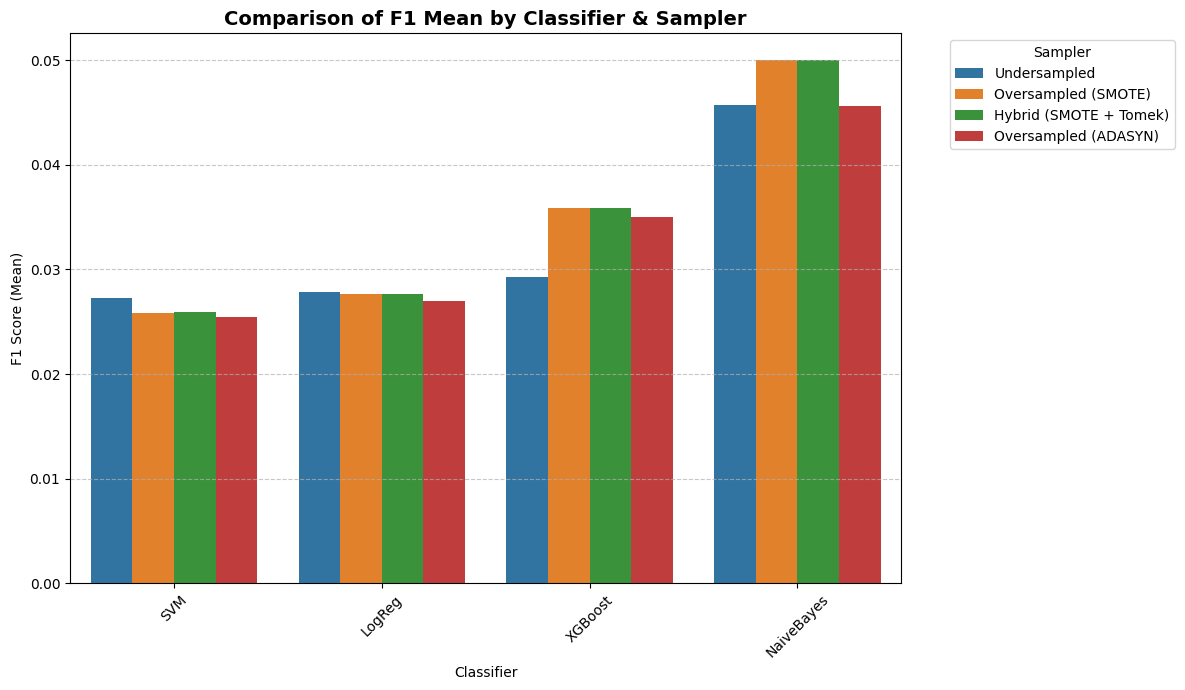

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(data=results_df, x='Classifier', y='F1 Mean', hue='Sampler', errorbar=None)
plt.title("Comparison of F1 Mean by Classifier & Sampler", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("F1 Score (Mean)")
plt.xlabel("Classifier")
plt.legend(title="Sampler", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Modèles(SVM,LogReg,XGBoost,NaiveBayes) avec Cross validation et hyperparams

In [44]:
!pip install imbalanced-learn

In [49]:
from imblearn.pipeline import Pipeline
def make_pipeline(method):
    """
    Fabrique une pipeline selon la méthode de sampling.
    'clf' sera le RandomForest.
    """
    if method == "Undersampled":
        pipe = Pipeline([
            ('under', RandomUnderSampler(random_state=42)),
            ('clf', RandomForestClassifier(random_state=42))
        ])

    elif method == "Oversampled (SMOTE)":
        pipe = Pipeline([
            ('smote', SMOTE(random_state=42)),
            ('clf', RandomForestClassifier(random_state=42))
        ])

    elif method == "Oversampled (ADASYN)":
        pipe = Pipeline([
            ('adasyn', ADASYN(random_state=42)),
            ('clf', RandomForestClassifier(random_state=42))
        ])

    elif method == "Hybrid (SMOTE+Tomek)":
        pipe = Pipeline([
            ('smote_tomek', SMOTETomek(random_state=42)),
            ('clf', RandomForestClassifier(random_state=42))
        ])
    else:
        raise ValueError(f"Méthode {method} inconnue.")

    return pipe

In [50]:
param_grids = {

    "Undersampled": {
        'under__sampling_strategy': [0.5, 1.0],
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [10, 20],
    },

    "Oversampled (SMOTE)": {
        'smote__sampling_strategy': [0.5, 1.0],
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [10, 20],
    },

    "Oversampled (ADASYN)": {
        'adasyn__sampling_strategy': [0.5, 1.0],
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [10, 20],
    },

    "Hybrid (SMOTE+Tomek)": {
        'smote_tomek__sampling_strategy': [0.5, 1.0],
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [10, 20],
    }

}

In [53]:
from sklearn.model_selection import GridSearchCV

def run_all_pipelines_with_gridsearch(X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'pr_auc': 'average_precision'
}
    # On stocke les resultats
    results_list = []

    for method in methods:
        print(f"\n=== Méthode: {method} ===")

        pipeline = make_pipeline(method)
        param_grid = param_grids[method]

        # On utilise la F1 comme métrique principale

        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
             refit='f1',
            n_jobs=12,
            verbose=1
        )

        start_time = time.time()
        grid_search.fit(X, y)
        end_time = time.time()

        best_f1 = grid_search.best_score_
        best_params = grid_search.best_params_
        exec_time = end_time - start_time

        print(f"Meilleure F1 trouvée: {best_f1:.4f}")
        print(f"Meilleurs paramètres: {best_params}")
        print(f"Temps d'execution: {exec_time:.2f}s")

        results_list.append({
            'Method': method,
            'Best F1': best_f1,
            'Best Params': best_params,
            'Execution Time (s)': exec_time
        })

    return pd.DataFrame(results_list)

In [ ]:
results_df = run_all_pipelines_with_gridsearch(X_train, y_train)
display(results_df)


=== Méthode: Undersampled ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleure F1 trouvée: 0.0916
Meilleurs paramètres: {'clf__max_depth': 20, 'clf__n_estimators': 100, 'under__sampling_strategy': 0.5}
Temps d'execution: 323.03s

=== Méthode: Oversampled (SMOTE) ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
